In [1]:
import moench.moench as moench
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#datapath = '/scratch/2022_03_25/test_moench_02/test_moench_02__2.clust'
datapath = 'ge_wafer_01__0.clust'

In [5]:
gainmap = np.ones(shape=(400,400))

In [6]:
proc = moench.ClusterFileProcessor(gainmap)

In [7]:
%timeit -r1 -n1 hist = proc.process_file(datapath, 1, 10000, 100)

845 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
hist = proc.process_file(datapath, 1, 10000, 100)
print(hist.sum())


4084188


In [14]:
%timeit -r1 -n1 hist = proc.process_file(datapath, 1, 10000, 100)

2.76 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
print(hist.sum())


4084188


In [11]:
energy_hist = hist.sum(axis=(1,2))
image = hist.sum(axis=0)
median = np.median(image.ravel())

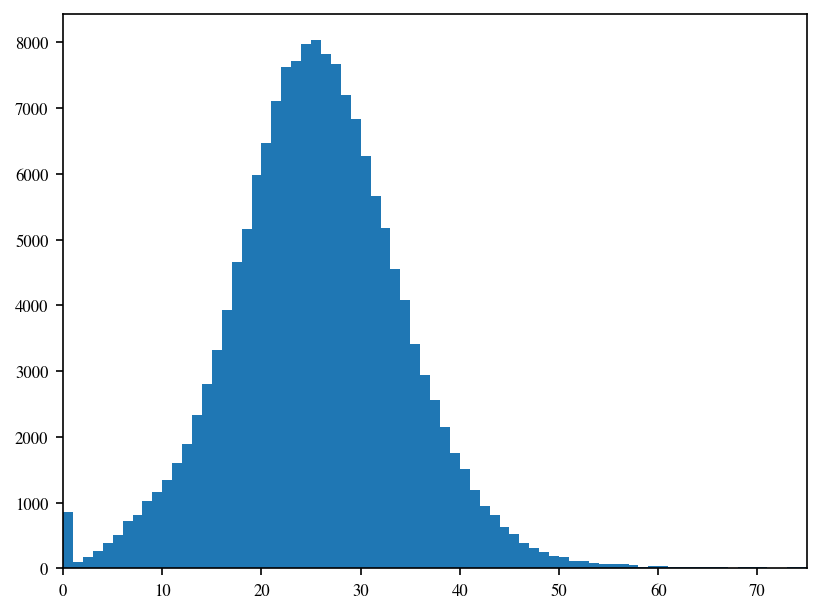

In [12]:
fig, ax = plt.subplots(dpi=150)
_ = ax.hist(image.ravel(), range=(0, int(3 * median)), bins = int(3 * median))

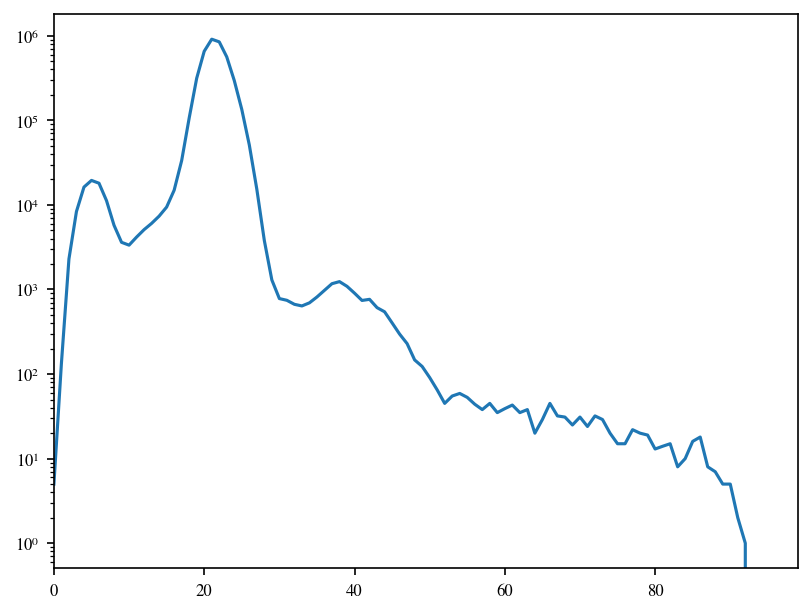

In [13]:
fig, ax = plt.subplots(dpi=150)
ax.plot(energy_hist)
ax.set_yscale('log')

(-0.5, 399.5, -0.5, 399.5)

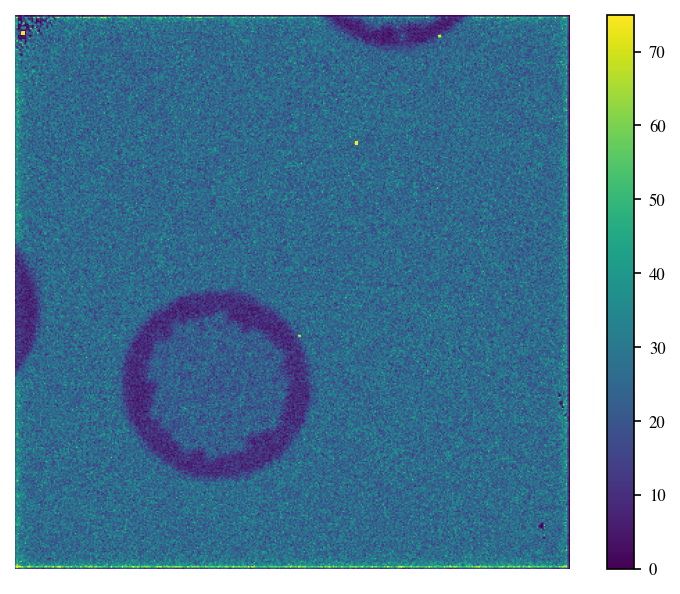

In [14]:
fig, ax = plt.subplots(dpi=150)
im = ax.imshow(image, clim=(0, 3 * median))
fig.colorbar(im)
ax.grid(False)
ax.axis('off')